''' problem statement:Analysing the growth of Indian Startups

1)what is the general amount startups get in india?
2)what kind of industries is more perferred for Startups?
3)Does location plays a keyrole?
4)How the funding  Ecosystem Changes with respect?
5)what are differnt kinds of funding for Startups
'''

## Importing libraries

In [1]:
##Basics libraries

import numpy as np
import pandas as pd
##For data visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py

##For jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

##For interactive displays
from IPython.display import display

##Supress warnings
import warnings
warnings.filterwarnings("ignore")

##Setting up the chart size and background of the visuals
plt.rcParams['figure.figsize']=(16,8)
plt.style.use('fivethirtyeight')
##For any other plt style (plt.style.available)


## Reading the dataset

In [2]:
data=pd.read_csv("startup_funding.csv")

## changing the names of the columns
data.columns=["SNo","Date","StartupName","IndustryVertical",
              "SubVertical","City","InvestorsName","InvestmentType","AmountinUSD","Remarks"]
## cleaning the dataset
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

columns=["StartupName","IndustryVertical","SubVertical","City","InvestorsName","InvestmentType","Remarks"]

for col in columns:
    
    data[col]=data[col].apply(lambda x:clean_string(x))
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountinUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [3]:
data.shape

(3044, 10)

In [4]:
## let's us total missing values
total=data.isnull().sum().sort_values(ascending=False)

In [5]:
total

AmountinUSD         960
SNo                   0
Date                  0
StartupName           0
IndustryVertical      0
SubVertical           0
City                  0
InvestorsName         0
InvestmentType        0
Remarks               0
dtype: int64

In [6]:
#percentage of missing values in the data
percent=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
percent

AmountinUSD         31.537451
SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     0.000000
SubVertical          0.000000
City                 0.000000
InvestorsName        0.000000
InvestmentType       0.000000
Remarks              0.000000
dtype: float64

In [7]:
missing_Data=pd.concat([total,percent],axis=1,keys=['Total','Percent%'])
missing_Data

,Total,Percent%
AmountinUSD,960,31.537451
SNo,0,0.000000
Date,0,0.000000
StartupName,0,0.000000
IndustryVertical,0,0.000000
SubVertical,0,0.000000
City,0,0.000000
InvestorsName,0,0.000000
InvestmentType,0,0.000000
Remarks,0,0.000000


In [8]:
data["Remarks"].value_counts()

nan                                  2625
Series A                              177
Series B                               64
Pre-Series A                           37
Series C                               28
                                     ... 
pre Series-A                            1
QPrize Contest Winners                  1
pre series A                            1
pre-series A                            1
Strategic Funding, Minority stake       1
Name: Remarks, Length: 70, dtype: int64

In [9]:
##let's remove the Remarks column as it contain many nan's and high cardinal values
data=data.drop(['Remarks'],axis=1)

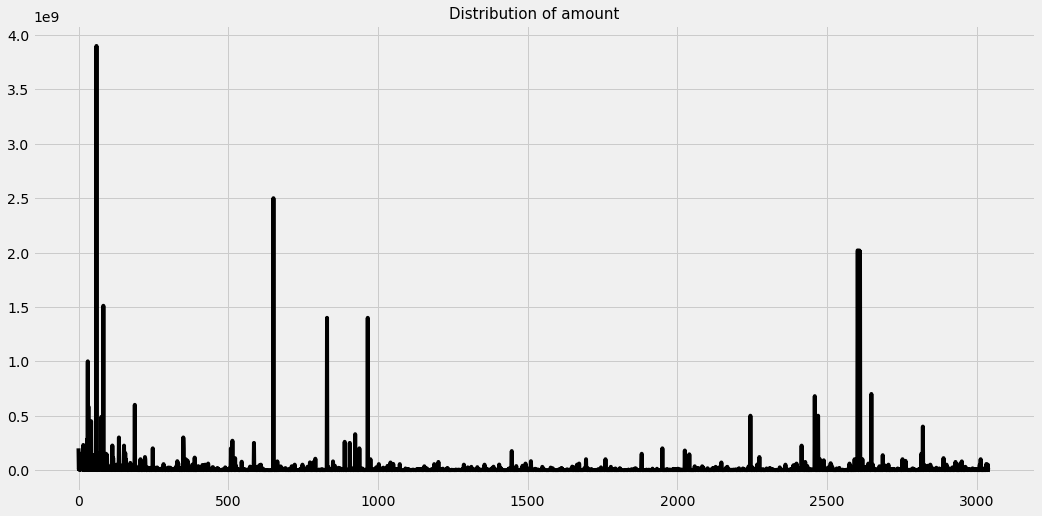

In [10]:
## Convert the AmountUSD column

def clean_amount(x):
    
    x=''.join([c for c in str(x) if c in['0','1','2','3','4','5','6','7','8','9']])
    x=str(x).replace(",","").replace("+","")
    x=str(x).lower().replace("undisclosed","")
    x=str(x).lower().replace("n/a","")
    if x=="":
        x='-999'
    return x

data["AmountinUSD"]=data["AmountinUSD"].apply(lambda x:float(clean_amount(x)))

data["AmountinUSD"].plot(kind="line",color="black")
plt.title("Distribution of amount",fontsize=15)
plt.show()

In [11]:
##cleaning the data's
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'

data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'

data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=="\\\\\xc2\\\\xa010/07/015"] = '10/07/2015'


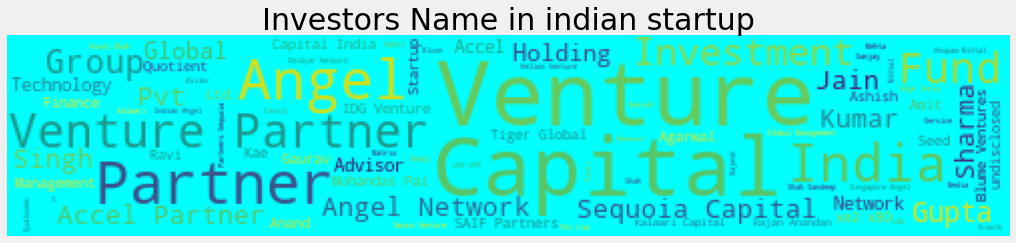

In [12]:
from wordcloud import WordCloud
names=data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
WordCloud=WordCloud(max_font_size=45,width=500,height=100,background_color="cyan").generate("".join(names))
plt.imshow(WordCloud)
plt.title("Investors Name in indian startup",fontsize=30)
plt.axis("off")
plt.show()

In [25]:
data['InvestorsName'][data['InvestorsName']=='Undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='UNdisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='UnDisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed Investor '] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='nan'] = 'Undisclosed Investors'

In [26]:
investors=data['InvestorsName'].value_counts().head(10)
print(investors)

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


Text(0.5, 1.0, 'Investor Name with Funding')

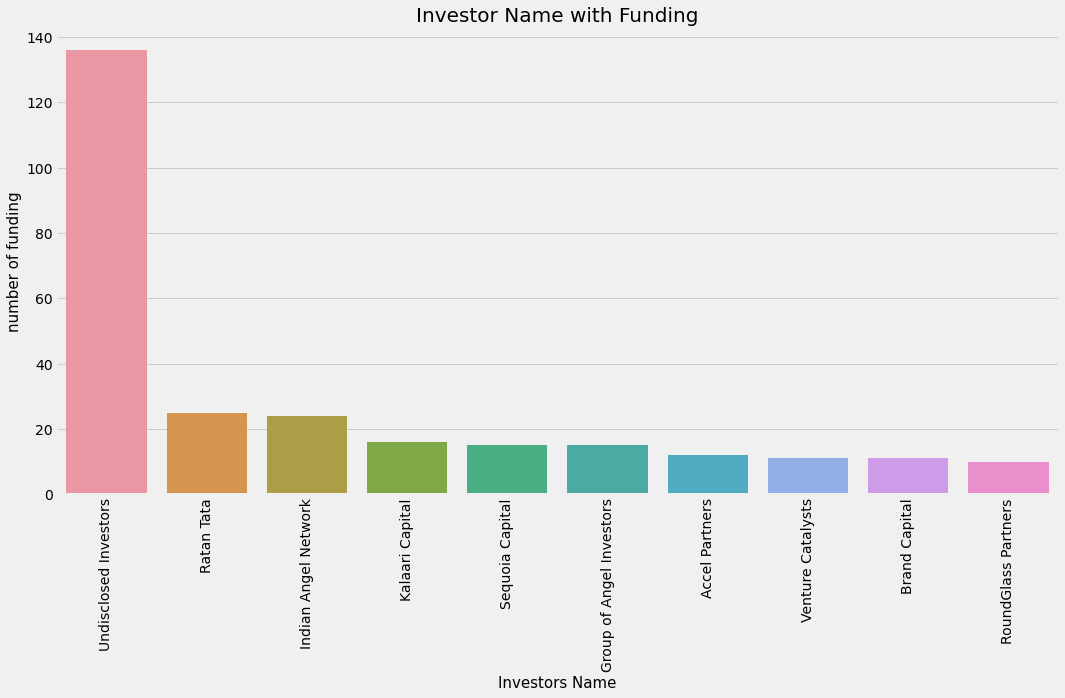

In [29]:
sns.barplot(investors.index,investors.values)
plt.xticks(rotation="vertical")
plt.xlabel("Investors Name",fontsize=15)
plt.ylabel("number of funding",fontsize=15)
plt.title("Investor Name with Funding",fontsize=20)

In [45]:
##display(data[data["InvestmentType"].value_counts()<=0][["InvestmentType",
      ##"StartupName"]].sort_values(by="InvestmentType",ascending=False).head(5).style.background_gradient(cmap="spring"))
    

In [34]:
data['InvestmentType'][data['InvestmentType']=='Seed\\nFunding '] = 'SeedFunding'
data['InvestmentType'][data['InvestmentType']=='Seed Funding'] = 'SeedFunding'
data['InvestmentType'][data['InvestmentType']=='Seed/ Angel Funding'] = 'SeedAngel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed / Angel Funding '] = 'SeedAngel Funding'
data['InvestmentType'][data['InvestmentType']=='Angel / Seed Funding'] = 'SeedAngel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed / Angle Funding'] = 'SeedAngel Funding'
data['InvestmentType'][data['InvestmentType']=='Crowd funding'] = 'Crowd Funding'

Text(0.5, 1.0, 'Investment Type with Funding')

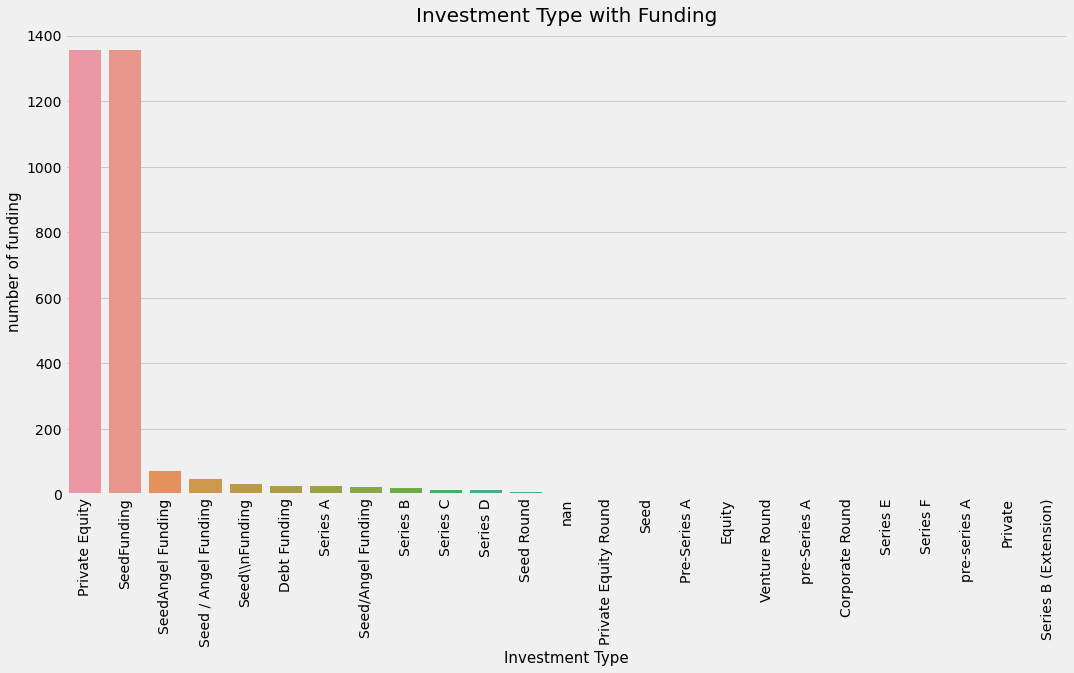

In [36]:
sns.barplot(InvestmentType.index,InvestmentType.values)
plt.xticks(rotation="vertical")
plt.xlabel("Investment Type",fontsize=15)
plt.ylabel("number of funding",fontsize=15)
plt.title("Investment Type with Funding",fontsize=20)

In [39]:
location=data['City'].value_counts().head(10)
print(location)

Bangalore    701
Mumbai       568
New Delhi    424
Gurgaon      291
nan          180
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Name: City, dtype: int64
